# 1. Data Pre-processing

## 1.1 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
smokedet = pd.read_csv("smoke_detection_iot.csv",index_col=0)
smokedet

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
smokedet.keys()

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

## 1.2 Data Cleaning

### 1.2.1 Familiarize with the Data Set

The first step is to ensure that we already familiar with the data inside the dataset that we used. For this step, we could use smokedet.info() to show the names of the attributes, the total of the data, and the type of the data.

In [ ]:
smokedet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


From the output, it can be concluded that dataset size is [62,630 x 15], which means that there are 62,630 rows in each of the 15 columns. The columns represent the attributes if the data. The attributes consist of 8 float data types, and 7 integer data types, which every data is in numerical state, not categorical.

### 1.2.2 Check Structural Errors

This step is actually to ensure the data is in character/string form. But as we can see from the step before, all of the data is in numerical, not string data types, so we can skip this step. However, we can use this step to see the value of the response variable that we chose, which is fire alarm. Since we would use decision tree and gradient boosting, we must ensure that the data is only in binary number, either 0 or 1.

In [ ]:
smokedet['Fire Alarm'].unique()

array([0, 1])

In [ ]:
smokedet[smokedet['Fire Alarm'] == 0]['Fire Alarm'].count()

17873

In [ ]:
smokedet[smokedet['Fire Alarm'] == 1]['Fire Alarm'].count()

44757

The result above shown that the variable 'Fire Alarm' only consists of 0 and 1, which means that this variable can be identified as binary and used as response variable to do the modelling and prediction of the dataset.

### 1.2.3 Handling Missing Values

In [ ]:
total = smokedet.isnull().sum().sort_values(ascending=False)
percent=(smokedet.isnull().sum()/smokedet.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missingData.head(15)

,Total,Percent
UTC,0,0.0
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0


In [ ]:
smokedet.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

### 1.2.4 Check Data Irregularities

First, check if there is a duplicate data in this dataset.

In [ ]:
smokedet.duplicated().sum()

0

Next, we wanted to eliminate the unnecessaries attributes.

In [ ]:
smokedet.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


After analyzing the existing data information, we decided to remove two columns that were not so significant in modeling, namely 'UTC' and 'CNT'.

In [ ]:
smokedet.drop(['UTC','CNT'],axis = 1,inplace=True)

In [ ]:
smokedet.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


# 2. Exploratory Data Analysis (EDA)

## 2.1 Check the Imbalance

We would analyze the target / response / dependent variable whether it is balance or not. If the the difference of the count between 0 and 1 is 5 times, then dataset is imbalanced. Otherwise, the data still can be called as balanced dataset.

(array([0, 1]), [Text(0, 0, 'No Alarm'), Text(1, 0, 'Alarm')])

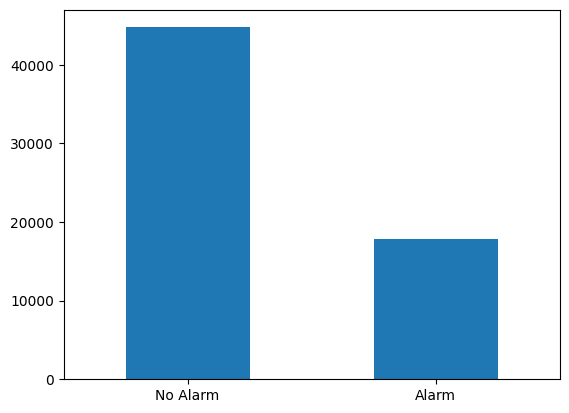

In [ ]:
smokedet["Fire Alarm"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.xticks(rotation=0)

The output from the bar graph shows that the sum of 'no alarm' around 4500 and 'alarm' is around 1800. The difference between both of them is 2.5 times. This means that the data is still considered as balanced dataset.

## 2.2 Check the Outliers

Boxplots can be used to identify whether there are outliers or not, because if there are outliers, we can find where they are located, in which row, and most likely they will be removed to make the prediction results better.

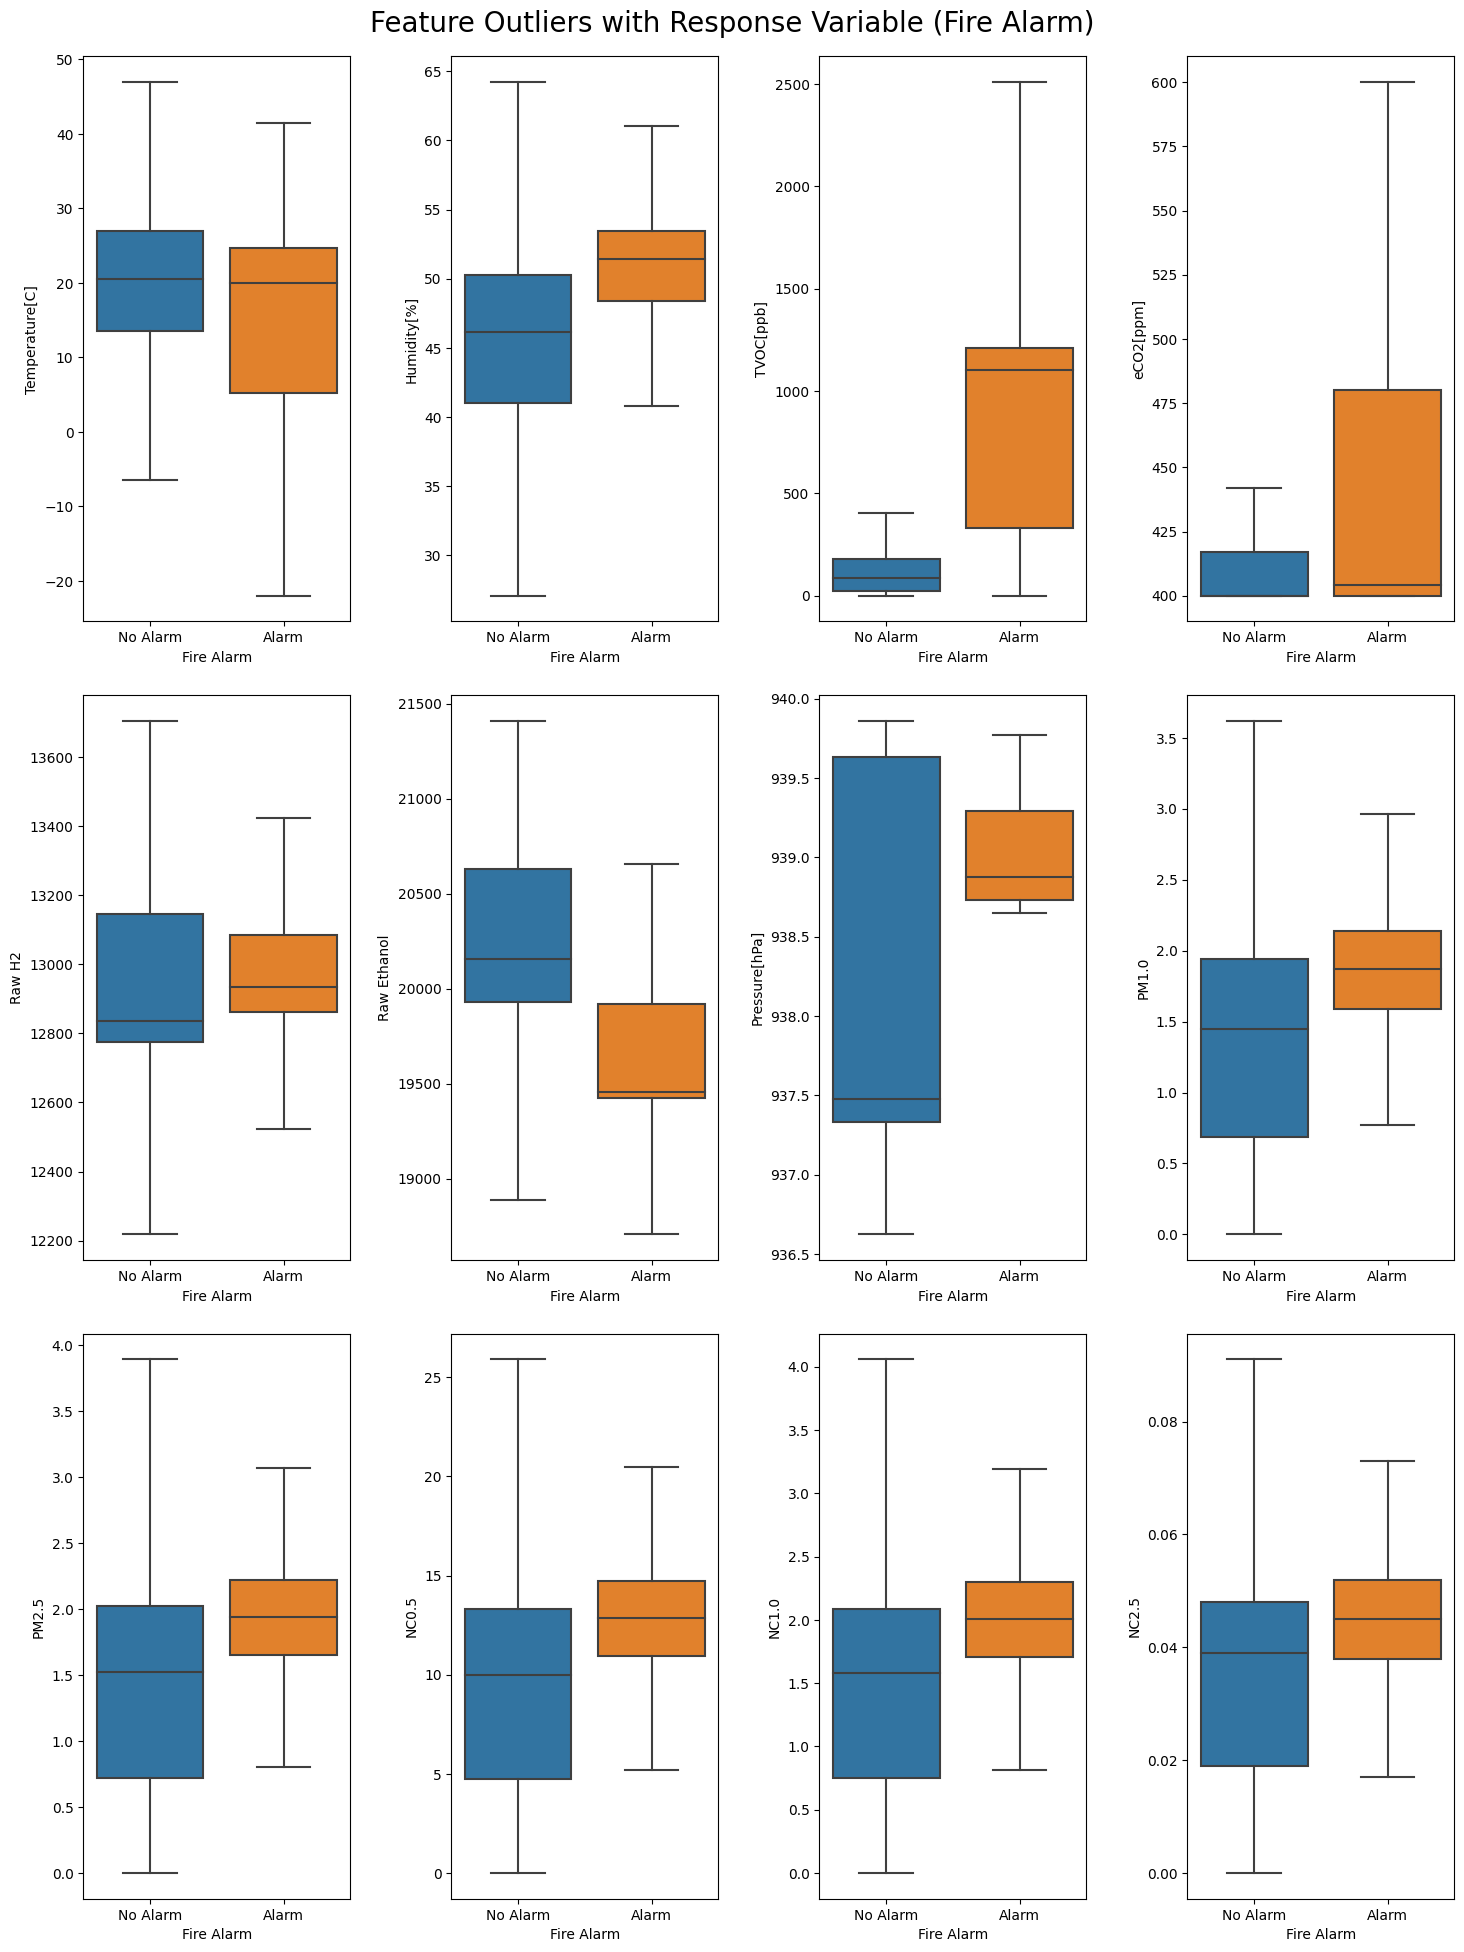

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 20))

for feature, subplot in zip(smokedet, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = smokedet['Fire Alarm'], y = smokedet[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Outliers with Response Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

It can be seen that:

1. Alarms that sound have a much higher TVOC than alarms that do not sound.
2. The alarm that sounded had a lower Raw Ethanol than the alarm that did not sound.
3. The average Air Pressure (Pressure) of the non-alarm is lower than the alarm that sounded.

## 2.3 Check the Correlations

<Axes: >

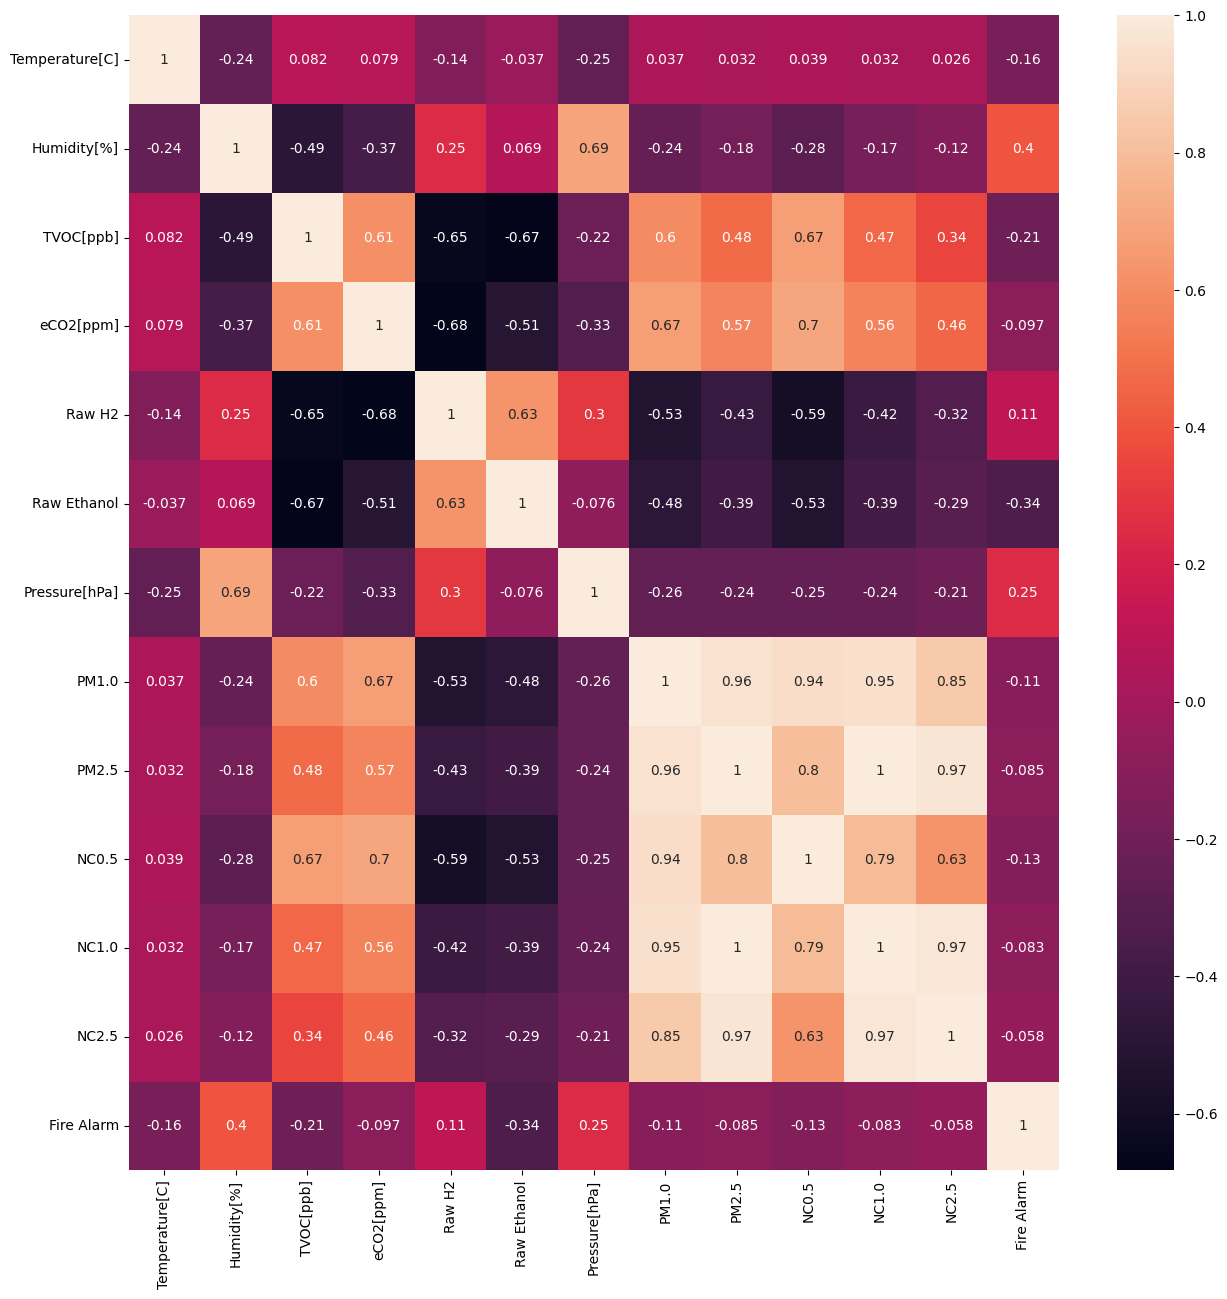

In [ ]:
corr = smokedet.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

# 3. Dimensionality Reduction (PCA)

## 3.1 Scaling (Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = smokedet.drop(['Fire Alarm'],axis=1)
y = smokedet['Fire Alarm']

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
smokedet_x = pd.DataFrame(data = x_scaled, columns = smokedet.columns[0:12])
smokedet_x.head(10)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
1,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
2,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
3,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
4,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
5,0.285705,0.629477,-0.248614,-0.141679,-1.921199,-1.240767,0.824250,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
6,0.286750,0.571949,-0.248614,-0.141679,-1.873486,-1.142327,0.834014,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
7,0.287795,0.525702,-0.248614,-0.141679,-1.847794,-1.050450,0.849037,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
8,0.288770,0.481710,-0.248614,-0.141679,-1.814762,-0.983183,0.849037,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
9,0.289814,0.442230,-0.248614,-0.141679,-1.796411,-0.917556,0.847534,-0.108068,-0.091428,-0.115215,-0.089952,-0.071323


In [ ]:
smokedet_x.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
count,6.263000e+04,6.263000e+04,62630.000000,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,62630.000000,6.263000e+04,6.263000e+04,62630.000000
mean,-5.808684e-17,-2.613908e-16,0.000000,1.815214e-17,-3.412602e-16,1.568345e-15,-6.630613e-14,3.630428e-18,0.000000,7.260855e-18,1.452171e-17,0.000000
std,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008
min,-2.644975e+00,-4.263760e+00,-0.248614,-1.416786e-01,-8.347780e+00,-7.280062e+00,-5.840500e+00,-1.090433e-01,-0.093340,-1.152149e-01,-9.192422e-02,-0.073889
25%,-3.465432e-01,-1.138709e-01,-0.231972,-1.416786e-01,-4.127324e-01,-5.237958e-01,5.434443e-02,-1.076558e-01,-0.092662,-1.131472e-01,-9.129931e-02,-0.073858
50%,2.896750e-01,1.816635e-01,-0.123031,-1.416786e-01,-6.773028e-02,-4.155118e-01,1.414752e-01,-1.070813e-01,-0.092389,-1.122962e-01,-9.104691e-02,-0.073848
75%,6.573419e-01,5.302136e-01,-0.096403,-1.217402e-01,6.112632e-01,5.311529e-01,5.936536e-01,-1.067778e-01,-0.092237,-1.118343e-01,-9.090874e-02,-0.073842
max,3.061367e+00,3.007288e+00,7.432343,3.113013e+01,3.158406e+00,2.716521e+00,9.264028e-01,1.542855e+01,22.895322,1.429815e+01,2.334881e+01,27.641769


## 3.2 PCA Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
smokedet_pca = pca.fit(smokedet_x)

## Plot the explained variance ratio

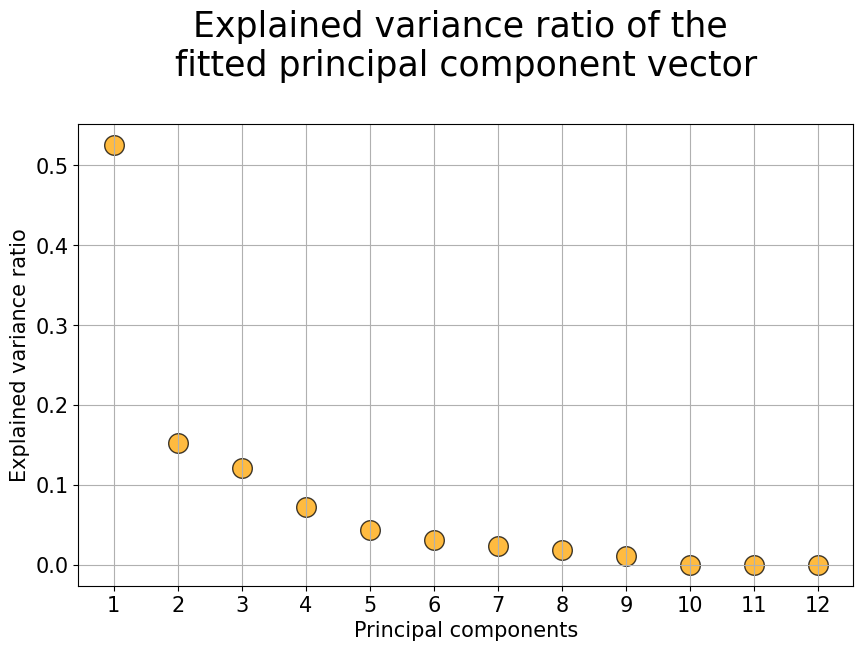

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(smokedet_pca.explained_variance_ratio_))],
            y=smokedet_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(smokedet_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

Showing better class separation using principal components

In [ ]:
# Transform the scaled data set using the fitted PCA object
smokedet_trans = pca.transform(smokedet_x)

In [ ]:
# Put it in a data frame
smokedet_trans = pd.DataFrame(data = smokedet_trans)
smokedet_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.580507,0.371626,-2.415334,1.123623,1.069251,-1.372491,-0.099813,-0.032211,-0.915377,-6.352267e-07,-1.858539e-07,-1.204360e-07
1,0.500161,0.360411,-2.232252,1.067556,1.000276,-1.233331,-0.099635,-0.101580,-0.890719,-6.101398e-07,-1.784266e-07,-1.163986e-07
2,0.439056,0.334954,-2.073280,1.014632,0.947455,-1.121491,-0.101933,-0.166599,-0.878495,-5.925753e-07,-1.733675e-07,-1.137695e-07
3,0.401235,0.303023,-1.958349,0.972250,0.911453,-1.042226,-0.103821,-0.227274,-0.886506,-5.861506e-07,-1.716871e-07,-1.133285e-07
4,0.368939,0.278154,-1.864308,0.937659,0.879135,-0.972962,-0.104067,-0.282305,-0.897683,-5.821513e-07,-1.706707e-07,-1.133223e-07
5,0.334254,0.246991,-1.754115,0.897762,0.849724,-0.904428,-0.108354,-0.329755,-0.895158,-5.731065e-07,-1.682028e-07,-1.121148e-07
6,0.304770,0.229000,-1.674396,0.869107,0.816266,-0.842402,-0.105444,-0.373780,-0.904667,-5.685012e-07,-1.670479e-07,-1.119078e-07
7,0.280456,0.215325,-1.610677,0.846542,0.796315,-0.788589,-0.107432,-0.425114,-0.918325,-5.689426e-07,-1.670921e-07,-1.126641e-07
8,0.261894,0.197178,-1.552266,0.824597,0.773272,-0.748177,-0.105492,-0.452990,-0.924646,-5.653084e-07,-1.662684e-07,-1.124075e-07
9,0.249907,0.179584,-1.498568,0.804958,0.759729,-0.714667,-0.106893,-0.486400,-0.933237,1.072865e-04,3.592698e-05,2.507408e-05


Plot the first two columns of this transformed data set with the color set to original ground truth class label

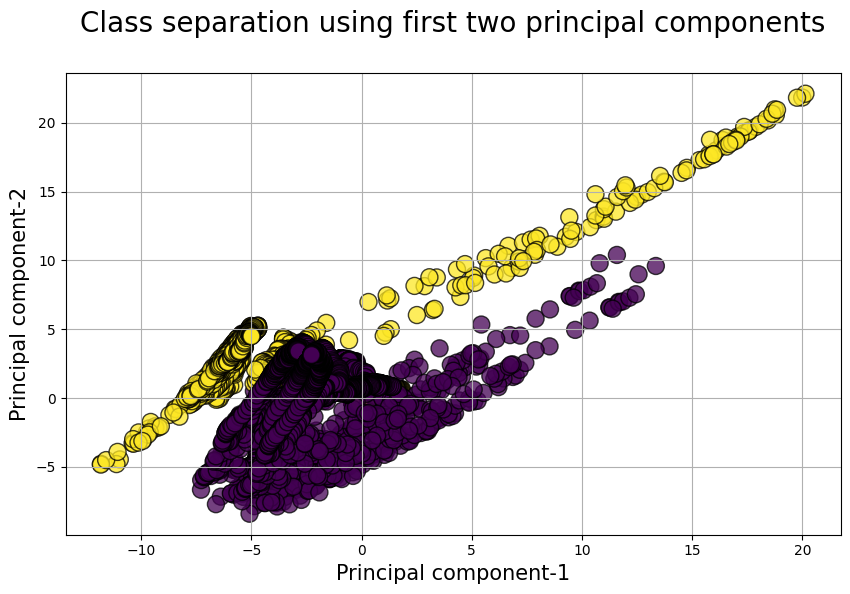

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(smokedet_trans[1], smokedet_trans[2], c=smokedet['Fire Alarm'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# 4. Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

## 4.1 Splitting Data (Before PCA)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50104, 12)
(12526, 12)
(50104,)
(12526,)


## 4.2 Splitting Data (After PCA)

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(smokedet_trans, y, test_size=0.20, random_state=42)

In [ ]:
print(x_train_pca.shape)
print(x_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(50104, 12)
(12526, 12)
(50104,)
(12526,)


# 5. Logistic Regression (Before PCA)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import statsmodels.api as sm

In [ ]:
# digunakan untuk membntuk model
logreg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.269558
         Iterations 11


In [ ]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:             Fire Alarm   No. Observations:                50104
Model:                          Logit   Df Residuals:                    50092
Method:                           MLE   Df Model:                           11
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.5489
Time:                        10:19:00   Log-Likelihood:                -13506.
converged:                       True   LL-Null:                       -29942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Temperature[C]    -0.0475      0.001    -32.120      0.000      -0.050      -0.045
Humidity[%]       -0.0218      0.002     -9.000      0.000      -0.027      -0.017
TVOC[ppb]         -0.0014   3.66e-05

From the result, we can conclude that the independent variables are independent towards the dependent/target variable is by seeing the p-value from P>|z|. If it is under the significance level (assumed that \alpha = 0.05), then the variable is significant.

Based on the analysis :
1. Temperature, humidity, TVOC, Co2, Raw H2, Raw Ethanol, Pressure, NC0.5, NC1.0, NC2.5 are very significant towards the target variable (fire alarm) cause the p-value is far under from the significance level.
2. PM1.0 shows a slight significant towards 'fire alarm' which only a little bit under the significance level.
3. PM2.5 is most likely not significant because the p-value score is far above from the significance level.

## 5.1 Using All Variable (Full Model)

**For Training Data**

In [ ]:
yp_train_lr1 = logreg.predict(x_train)
yp_train_lr1.head()

28479    7.947524e-01
42605    9.368124e-01
17963    9.564506e-01
56394    9.706235e-28
29875    5.652358e-01
dtype: float64

In [ ]:
yhat_train_lr1 = (yp_train_lr1 >= 0.5).astype(int)
yhat_train_lr1.head()

28479    1
42605    1
17963    1
56394    0
29875    1
dtype: int64

In [ ]:
cm_train_lr1 = confusion_matrix(y_train, yhat_train_lr1)
print(cm_train_lr1)

[[ 8914  5365]
 [  670 35155]]


In [ ]:
print(classification_report(y_train, yhat_train_lr1))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75     14279
           1       0.87      0.98      0.92     35825

    accuracy                           0.88     50104
   macro avg       0.90      0.80      0.83     50104
weighted avg       0.89      0.88      0.87     50104



**For Testing Data**

In [ ]:
yp_test_lr1 = logreg.predict(x_test)
yp_test_lr1.head()

31120    0.576519
49054    0.970116
55910    0.000462
33802    0.745954
9683     0.952304
dtype: float64

In [ ]:
yhat_test_lr1 = (yp_test_lr1 >= 0.5).astype(int)
yhat_test_lr1.head()

31120    1
49054    1
55910    0
33802    1
9683     1
dtype: int64

In [ ]:
cm_test_lr2 = confusion_matrix(y_test, yhat_test_lr1)
print(cm_test_lr2)

[[2294 1300]
 [ 184 8748]]


In [ ]:
print(classification_report(y_test, yhat_test_lr1))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      3594
           1       0.87      0.98      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.90      0.81      0.84     12526
weighted avg       0.89      0.88      0.87     12526



## 5.2 Only Significant Variable

In [ ]:
xtrain_lr_sig = x_train.loc[:, x_train.columns != 'PM2.5']
xtrain_lr_sig.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,NC1.0,NC2.5
28479,21.430,59.72,283,400,13138,19923,939.672,1.38,9.48,1.478,0.033
42605,25.980,47.24,1247,422,12886,19423,938.734,1.73,11.88,1.853,0.042
17963,18.116,47.55,1124,400,12909,19446,938.710,1.56,10.75,1.677,0.038
56394,59.620,11.60,60000,4305,11771,17216,936.746,1382.21,9039.26,1709.083,216.618
29875,22.250,48.83,24,400,13255,20202,939.700,2.25,15.47,2.412,0.054


In [ ]:
xtest_lr_sig = x_test.loc[:, x_test.columns != 'PM2.5']
xtest_lr_sig.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,NC1.0,NC2.5
31120,21.33,51.93,138,400,13190,20128,939.690,0.96,6.60,1.030,0.023
49054,24.30,53.78,1297,400,13015,19403,938.774,2.03,13.99,2.181,0.049
55910,43.33,18.53,0,400,13621,21322,936.812,1.16,7.98,1.245,0.028
33802,18.44,56.79,358,400,13069,19907,939.295,0.33,2.24,0.349,0.008
9683,-4.35,57.35,825,977,12634,19523,939.138,2.58,17.78,2.773,0.063


In [ ]:
logreg_significance = sm.Logit(y_train, xtrain_lr_sig).fit()
print(logreg_significance.summary())

Optimization terminated successfully.
         Current function value: 0.269558
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             Fire Alarm   No. Observations:                50104
Model:                          Logit   Df Residuals:                    50093
Method:                           MLE   Df Model:                           10
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.5489
Time:                        10:20:33   Log-Likelihood:                -13506.
converged:                       True   LL-Null:                       -29942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Temperature[C]    -0.0475      0.001    -32.120      0.000      -0.050      -0.045
Humidity[%]     

**For Training Data**

In [ ]:
yhat_train_lr2 = logreg_significance.predict(xtrain_lr_sig)
yhat_train_lr2 = (yhat_train_lr2 >=0.5).astype(int)

In [ ]:
cm_train_lr2 = confusion_matrix(y_train,yhat_train_lr2)
print(cm_train_lr2)

[[ 8914  5365]
 [  670 35155]]


In [ ]:
print(classification_report(y_train, yhat_train_lr2))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75     14279
           1       0.87      0.98      0.92     35825

    accuracy                           0.88     50104
   macro avg       0.90      0.80      0.83     50104
weighted avg       0.89      0.88      0.87     50104



**For Testing Data**

In [ ]:
yhat_test_lr2 = logreg_significance.predict(xtest_lr_sig)
yhat_test_lr2 = (yhat_test_lr2 >=0.5).astype(int)

In [ ]:
cm_test_lr2 = confusion_matrix(y_test,yhat_test_lr2)
print(cm_test_lr2)

[[2294 1300]
 [ 183 8749]]


In [ ]:
print(classification_report(y_test, yhat_test_lr2))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      3594
           1       0.87      0.98      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.90      0.81      0.84     12526
weighted avg       0.89      0.88      0.87     12526



# 6. Logistic Regression (After PCA)

In [ ]:
# digunakan untuk membentuk model
logreg_pca = sm.Logit(y_train, x_train_pca).fit()

         Current function value: 0.206765
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(logreg_pca.summary())

                           Logit Regression Results                           
Dep. Variable:             Fire Alarm   No. Observations:                50104
Model:                          Logit   Df Residuals:                    50092
Method:                           MLE   Df Model:                           11
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.6540
Time:                        10:21:27   Log-Likelihood:                -10360.
converged:                      False   LL-Null:                       -29942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -2.2358      0.076    -29.273      0.000      -2.386      -2.086
1              3.5398      0.082     43.420      0.000       3.380       3.700
2              1.8992      0.051     37.102      0.0

## 6.1 Using All Variable (Full Model)

**For Training Data**

In [ ]:
yp_train_lr1_pca = logreg_pca.predict(x_train_pca)
yp_train_lr1_pca.head()

28479    9.200553e-01
42605    9.584527e-01
17963    9.839650e-01
56394    4.792226e-46
29875    2.626022e-01
dtype: float64

In [ ]:
yhat_train_lr1_pca = (yp_train_lr1_pca >= 0.5).astype(int)
yhat_train_lr1_pca.head()

28479    1
42605    1
17963    1
56394    0
29875    0
dtype: int64

In [ ]:
cm_train_lr1_pca = confusion_matrix(y_train, yhat_train_lr1_pca)
print(cm_train_lr1_pca)

[[10784  3495]
 [ 1695 34130]]


In [ ]:
print(classification_report(y_train, yhat_train_lr1_pca))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     14279
           1       0.91      0.95      0.93     35825

    accuracy                           0.90     50104
   macro avg       0.89      0.85      0.87     50104
weighted avg       0.89      0.90      0.89     50104



**For Testing Data**

In [ ]:
yp_test_lr1_pca = logreg_pca.predict(x_test_pca)
yp_test_lr1_pca.head()

31120    0.374286
49054    0.997427
55910    0.000006
33802    0.891712
9683     0.989247
dtype: float64

In [ ]:
yhat_test_lr1_pca = (yp_test_lr1_pca >= 0.5).astype(int)
yhat_test_lr1_pca.head()

31120    0
49054    1
55910    0
33802    1
9683     1
dtype: int64

In [ ]:
cm_test_lr2_pca = confusion_matrix(y_test, yhat_test_lr1_pca)
print(cm_test_lr2_pca)

[[2718  876]
 [ 443 8489]]


In [ ]:
print(classification_report(y_test, yhat_test_lr1_pca))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      3594
           1       0.91      0.95      0.93      8932

    accuracy                           0.89     12526
   macro avg       0.88      0.85      0.87     12526
weighted avg       0.89      0.89      0.89     12526



## 4.2 Only Significant Variable

In [ ]:
xtrain_lr_pca_sig = x_train_pca.loc[:, [0,1,2,3,4,6,7,8,9]]
xtrain_lr_pca_sig.head()

,0,1,2,3,4,6,7,8,9
28479,-0.833989,1.083437,-0.107456,0.787587,0.005934,-0.072999,0.037200,0.553707,-0.000002
42605,-0.008857,-0.371749,-0.281663,0.715242,-0.113726,0.119454,0.186668,-0.258654,-0.000004
17963,-0.075999,-0.150990,-0.309757,0.213211,-0.098336,0.117450,0.224146,-0.231533,0.000002
56394,7.739715,-6.175542,-4.191006,1.269606,-2.932962,-0.406466,-1.655026,0.752556,0.000004
29875,-0.884501,0.483986,0.576347,0.437249,-0.643988,0.218227,-0.121456,0.046487,-0.000002


In [ ]:
xtest_lr_pca_sig = x_test_pca.loc[:, [0,1,2,3,4,6,7,8,9]]
xtest_lr_pca_sig.head()

,0,1,2,3,4,6,7,8,9
31120,-0.841872,0.644624,0.336723,0.497147,-0.395089,0.109040,-0.136875,0.153254,-6.319210e-07
49054,-0.255080,0.192938,-0.324833,0.789309,-0.069737,0.046716,0.467543,0.293726,2.275655e-06
55910,-0.797268,-2.704224,3.922598,0.111555,-1.856145,0.478252,-0.092695,-0.294536,2.650744e-07
33802,-0.673327,0.777947,-0.059288,0.468803,0.088451,-0.092481,0.009170,0.389388,-3.944474e-06
9683,-0.026343,0.912989,-1.248846,-0.853408,1.058035,-0.145286,-0.292740,-0.111096,2.567082e-06


In [ ]:
logreg_significance_pca = sm.Logit(y_train, xtrain_lr_pca_sig).fit()
print(logreg_significance_pca.summary())

         Current function value: 0.206742
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:             Fire Alarm   No. Observations:                50104
Model:                          Logit   Df Residuals:                    50095
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.6540
Time:                        10:23:50   Log-Likelihood:                -10359.
converged:                      False   LL-Null:                       -29942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -2.3475      0.037    -62.739      0.000      -2.421      -2.274
1              3.4386      0.051     67.137      0.000       3.338       3.539
2              1.8644      0.047     39.404      0.0

**For Training Data**

In [ ]:
yp_train_lr2_pca = logreg_significance_pca.predict(xtrain_lr_pca_sig)
yhat_train_lr2_pca = (yp_train_lr2_pca >=0.5).astype(int)

In [ ]:
cm_train_lr2_pca = confusion_matrix(y_train,yhat_train_lr2_pca)
print(cm_train_lr2_pca)

[[10780  3499]
 [ 1695 34130]]


In [ ]:
print(classification_report(y_train, yhat_train_lr2_pca))

              precision    recall  f1-score   support

           0       0.86      0.75      0.81     14279
           1       0.91      0.95      0.93     35825

    accuracy                           0.90     50104
   macro avg       0.89      0.85      0.87     50104
weighted avg       0.89      0.90      0.89     50104



**For Testing Data**

In [ ]:
yp_test_lr2_pca = logreg_significance_pca.predict(xtest_lr_pca_sig)
yhat_test_lr2_pca = (yp_test_lr2_pca >=0.5).astype(int)

In [ ]:
cm_test_lr2_pca = confusion_matrix(y_test,yhat_test_lr2_pca)
print(cm_test_lr2_pca)

[[2719  875]
 [ 439 8493]]


In [ ]:
print(classification_report(y_test, yhat_test_lr2_pca))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3594
           1       0.91      0.95      0.93      8932

    accuracy                           0.90     12526
   macro avg       0.88      0.85      0.87     12526
weighted avg       0.89      0.90      0.89     12526



# 6. Support Vector Machine (Classifier)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

**Training Data**

In [ ]:
yhat_train_svc = svc.predict(x_train)
yhat_train_svc

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
cm_train_svc = confusion_matrix(y_train, yhat_train_svc)
print(cm_train_svc)

[[ 8590  5689]
 [  215 35610]]


In [ ]:
print(classification_report(y_train, yhat_train_svc))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     14279
           1       0.86      0.99      0.92     35825

    accuracy                           0.88     50104
   macro avg       0.92      0.80      0.83     50104
weighted avg       0.89      0.88      0.87     50104



**Testing Data**

In [ ]:
yhat_test_svc = svc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, yhat_test_svc))

[[2221 1373]
 [  58 8874]]


In [ ]:
print(classification_report(y_test, yhat_test_svc))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      3594
           1       0.87      0.99      0.93      8932

    accuracy                           0.89     12526
   macro avg       0.92      0.81      0.84     12526
weighted avg       0.90      0.89      0.88     12526



# 7. Hyperparameter Tuning

## 7.1 Standarization

Standardization is to change the features to the same scale. It is calculated by extracting the mean and divided by the standard deviation of each feature. After standardization, each feature has zero mean and unit standard deviation.

Standardization should be fit on the training dataset only to prevent test dataset information from leaking into the training process. Then, the test dataset is standardized using the fitting results from the training dataset.

There are different types of scalers. StandardScaler and MinMaxScaler are most commonly used. For a dataset with outliers, we can use RobustScaler.

In this study, we will use StandardScaler.

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)

# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)

# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],50104.0,-1.608875e-16,1.00001,-2.641590,-0.350883,0.290581,0.659470,3.063723
Humidity[%],50104.0,-2.997939e-16,1.00001,-4.277478,-0.115490,0.180825,0.530296,3.012786
TVOC[ppb],50104.0,4.892568e-18,1.00001,-0.248449,-0.231877,-0.122298,-0.095706,7.459355
eCO2[ppm],50104.0,3.775786e-17,1.00001,-0.140413,-0.140413,-0.140413,-0.120525,31.051485
Raw H2,50104.0,-2.299897e-15,1.00001,-8.369990,-0.415138,-0.069275,0.611413,3.164914
Raw Ethanol,50104.0,1.977909e-15,1.00001,-7.302478,-0.524917,-0.417938,0.532122,2.725613
Pressure[hPa],50104.0,-4.985109e-14,1.00001,-5.878148,0.051080,0.138719,0.595046,0.928225
PM1.0,50104.0,6.665238e-18,1.00001,-0.108024,-0.106602,-0.106029,-0.105720,15.690414
PM2.5,50104.0,1.914483e-18,1.00001,-0.091987,-0.091303,-0.091027,-0.090874,23.097272
NC0.5,50104.0,1.162871e-17,1.00001,-0.114595,-0.112467,-0.111608,-0.111135,14.637666


We can see that after using StandardScaler, all the features have zero mean because it is really small and same unit of standard deviation about 1.00001

In [ ]:
params = svc.get_params()
params_smokedet = pd.DataFrame(params, index=[0])
params_smokedet.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


We can see that the default hyperparameter has the C value of 1, the gamma value of scale, and the kernel value of rbf.

In [ ]:
# Run model
svc.fit(X_train_transformed, y_train)

# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test_transformed, y_test):.4f}')

The accuracy score of the model is 0.9685


## 7.2 Random Search

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

we use a random search for Support Vector Machine (SVM) hyperparameter tuning. Since random search randomly picks a subset of hyperparameter combinations, we can afford to try more values.

If at least one of the parameters is a distribution, sampling with replacement is used for a random search. Sampling without replacement is used if all parameters are provided as a list. Each list is treated as a uniform distribution.

We increased the number of C and gamma values from 1 to 5 for the random search. For gamma, the sklearn values of 'scale' and 'auto' are also included, so there are a total of 5 values for gamma.

In [ ]:
# List of C values
C_range = np.logspace(-3, 1, 5)
print(f'The list of values for C are {C_range}')

# List of gamma values
gamma_range = np.logspace(-3, 1, 5)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]
The list of values for gamma are [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [ ]:
# Define the search space
param_grid = {
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }

# Set up score
scoring = ['accuracy']

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Define random search
random_search = RandomizedSearchCV(estimator=svc,
                           param_distributions=param_grid,
                           n_iter=30,
                           scoring=scoring,
                           refit='accuracy',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)

In [ ]:
# Fit random search
random_result = random_search.fit(X_train_transformed, y_train)

In [ ]:
# Print random search summary
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'gamma': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  'scale', 'auto'],
                                        'kernel': ['rbf', 'poly']},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {random_result.best_score_:.4f}')

# Print the hyperparameters for the best score
print(f'The best hyperparameters are {random_result.best_params_}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {random_search.score(X_test_transformed, y_test):.4f}')

The best accuracy score for the training dataset is 0.9994
The best hyperparameters are {'kernel': 'poly', 'gamma': 10.0, 'C': 10.0}
The accuracy score for the testing dataset is 0.9999


**Training Data**

In [ ]:
random_train_svc = random_search.predict(X_train_transformed)

In [ ]:
print(confusion_matrix(y_train,random_train_svc))

[[14279     0]
 [    0 35825]]


In [ ]:
print(classification_report(y_train,random_train_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14279
           1       1.00      1.00      1.00     35825

    accuracy                           1.00     50104
   macro avg       1.00      1.00      1.00     50104
weighted avg       1.00      1.00      1.00     50104



**Testing Data**

In [ ]:
random_test_svc = random_search.predict(X_test_transformed)

In [ ]:
print(confusion_matrix(y_test,random_test_svc))

[[3593    1]
 [   0 8932]]


In [ ]:
print(classification_report(y_test,random_test_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

